Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None

Summary Statistics:
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000     

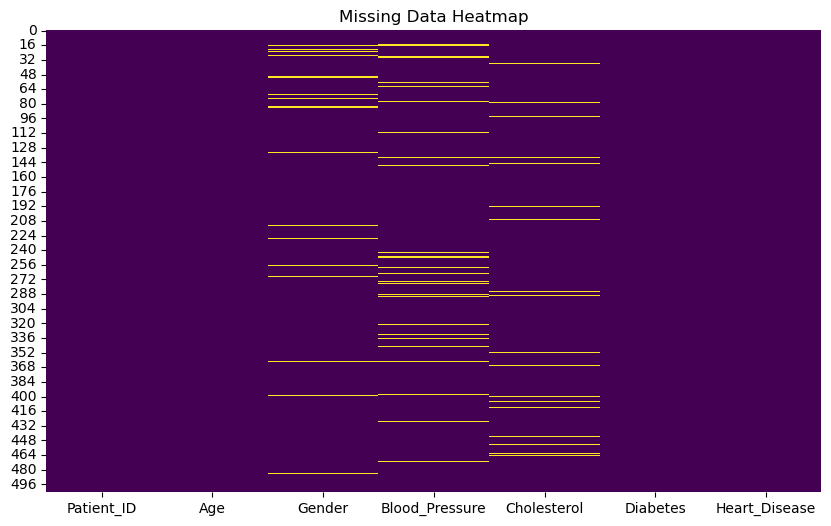

KeyError: 'numerical_column'

In [1]:
# Step 1: Load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('Day_15_Healthcare_Data.csv')

# Step 2: Perform initial EDA
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values per Column:")
print(df.isna().sum())

# Step 3: Calculate the percentage of missing values
missing_percentage = (df.isna().sum() / len(df)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)

# Step 4: Visualize missing data patterns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Step 5: Impute missing values

# Mean/Median/Mode imputation for numerical columns
df['numerical_column'].fillna(df['numerical_column'].mean(), inplace=True)  # Mean imputation
# df['numerical_column'].fillna(df['numerical_column'].median(), inplace=True)  # Median imputation

# Mode imputation for categorical columns
df['categorical_column'].fillna(df['categorical_column'].mode()[0], inplace=True)

# KNN Imputation for numerical columns
imputer = KNNImputer(n_neighbors=5)
df_imputed_knn = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['float64', 'int64'])), 
                              columns=df.select_dtypes(include=['float64', 'int64']).columns)

# Regression Imputation (example for a specific column)
observed_data = df.dropna(subset=['target_column'])
missing_data = df[df['target_column'].isna()]

if not missing_data.empty:
    model = LinearRegression()
    model.fit(observed_data[['predictor_column']], observed_data['target_column'])
    missing_data['target_column'] = model.predict(missing_data[['predictor_column']])
    df = pd.concat([observed_data, missing_data])

# Step 6: Evaluate the effect of imputation

# Statistical analysis before and after imputation
print("\nBefore Imputation:")
print("Mean:", df['numerical_column'].mean())
print("Standard Deviation:", df['numerical_column'].std())

print("\nAfter KNN Imputation:")
print("Mean:", df_imputed_knn['numerical_column'].mean())
print("Standard Deviation:", df_imputed_knn['numerical_column'].std())

# Visualize the impact using boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(df['numerical_column'])
plt.title('Before Imputation')

plt.subplot(1, 2, 2)
sns.boxplot(df_imputed_knn['numerical_column'])
plt.title('After KNN Imputation')

plt.show()

# Save the cleaned dataset (optional)
df.to_csv('cleaned_healthcare_dataset.csv', index=False)